In [1]:
import zipfile

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 176MB/s]
100% 1.06G/1.06G [00:10<00:00, 107MB/s]


In [5]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
train_ds = train_ds.take(100)

Found 20000 files belonging to 2 classes.


In [8]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


In [9]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in vgg_model.layers:
    layer.trainable = False

model = Sequential([
    vgg_model,
    Flatten(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 32769     
                                                                 
Total params: 14747457 (56.26 MB)
Trainable params: 32769 (128.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [10]:
history = model.fit(train_ds,
          epochs=10,
          validation_data=validation_ds)

Epoch 1/10
100/100 [==============================] - 56s 463ms/step - loss: 1.4652 - accuracy: 0.9331 - val_loss: 1.1122 - val_accuracy: 0.9540
Epoch 2/10
100/100 [==============================] - 43s 428ms/step - loss: 0.2731 - accuracy: 0.9803 - val_loss: 1.0141 - val_accuracy: 0.9592
Epoch 3/10
100/100 [==============================] - 43s 430ms/step - loss: 0.1732 - accuracy: 0.9909 - val_loss: 1.0627 - val_accuracy: 0.9622
Epoch 4/10
100/100 [==============================] - 43s 428ms/step - loss: 0.0979 - accuracy: 0.9925 - val_loss: 1.3009 - val_accuracy: 0.9626
Epoch 5/10
100/100 [==============================] - 58s 579ms/step - loss: 0.0327 - accuracy: 0.9956 - val_loss: 1.5014 - val_accuracy: 0.9576
Epoch 6/10
100/100 [==============================] - 44s 441ms/step - loss: 0.0866 - accuracy: 0.9947 - val_loss: 1.6686 - val_accuracy: 0.9520
Epoch 7/10
100/100 [==============================] - 43s 425ms/step - loss: 0.0518 - accuracy: 0.9969 - val_loss: 1.2842 - val_ac

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss')

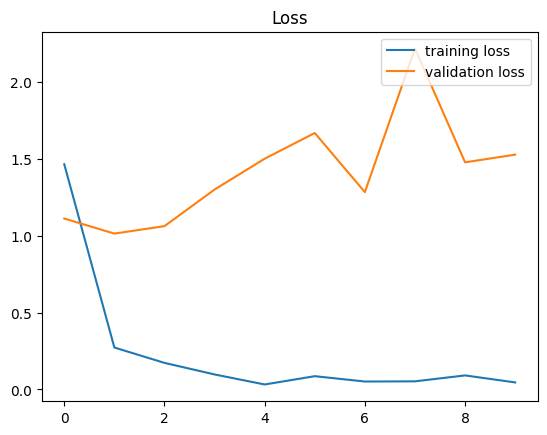

In [17]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend(loc="upper right")
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

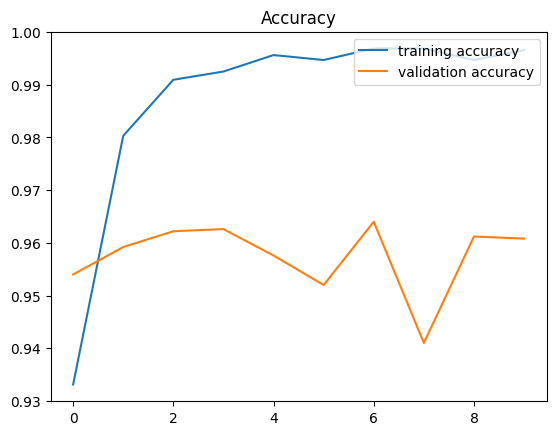

In [21]:
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend(loc="upper right")
plt.title("Accuracy")